In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from math import ceil, floor
from matplotlib.colors import LogNorm

In [29]:
fits_filex='hlsp_frontier_model_abell2744_williams_v4_x-pixels-deflect.fits'
fits_filey='hlsp_frontier_model_abell2744_williams_v4_y-pixels-deflect.fits'
img_file='hlsp_frontier_model_abell2744_williams_v4_kappa.fits'
mag_file='hlsp_frontier_model_abell2744_williams_v4_z01-magnif.fits'
hdul = fits.open(fits_filex)
hdul1 = fits.open(fits_filey)
hdul_mag = fits.open(mag_file)
hdul_img = fits.open(img_file)


In [30]:
datax = hdul[0].data

datay = hdul1[0].data

data_img = hdul_img[0].data

#array_data = np.zeros((datax.shape[0],datax.shape[1]))
#array_data[100:160, 100:160]=datax[100:160, 100:160]

data_mag = hdul_mag[0].data
hdul.close()
hdul1.close()
hdul_img.close()

(678, 678)


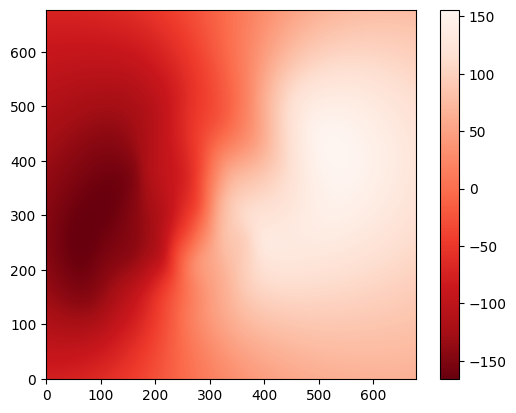

In [5]:
plt.imshow(datax, cmap='Reds_r')
plt.gca().invert_yaxis()
plt.colorbar()

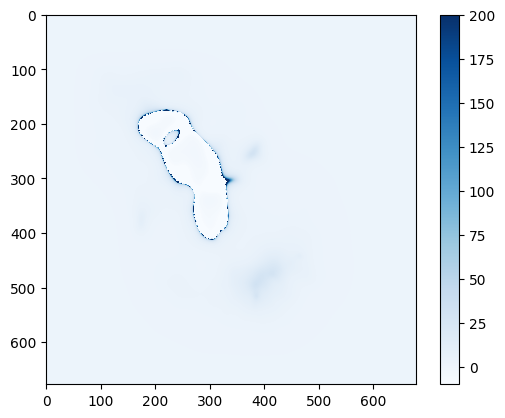

In [6]:
plt.imshow(data_mag, cmap='Blues',vmin=-10, vmax=200)
plt.colorbar()


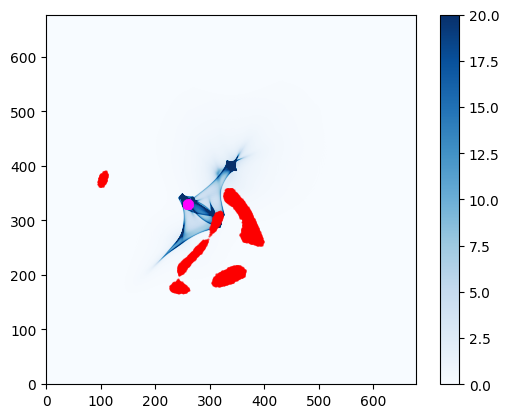

In [24]:
array_test = np.zeros((datax.shape[0],datax.shape[1]))
img_coord_in_src_coord = [[[] for _ in range(678)] for _ in range(678)]
for i in range(0,678):
    for j in range(0,678):
        ycoord = i-datay[i,j]
        xcoord = j-datax[i,j]
        ydec = ycoord%1
        xdec = xcoord%1
        array_test[ceil(ycoord),ceil(xcoord)] += data_img[i,j]*ydec*xdec
        array_test[ceil(ycoord),floor(xcoord)] += data_img[i,j]*ydec*(1-xdec)
        array_test[floor(ycoord),ceil(xcoord)] += data_img[i,j]*(1-ydec)*xdec
        array_test[floor(ycoord),floor(xcoord)] += data_img[i,j]*(1-ydec)*(1-xdec)
        img_coord_in_src_coord[floor(ycoord)][floor(xcoord)].append([i,j])

size = 678
mean = [260, 330] #(x,y)
cov = [[50, 0], [0, 50]]

# Generate a grid of (x, y) coordinates
x, y = np.meshgrid(np.linspace(0, size, size), np.linspace(0, size, size))

# Generate a 2D Gaussian distribution over the grid
d = np.dstack([x, y])
gaussian_circle = np.exp(-0.5 * (np.einsum('...k,kl,...l->...', d - mean, np.linalg.inv(cov), d - mean)))
circle_coords = np.argwhere(gaussian_circle > 0.5)


plt.scatter(circle_coords[:,1],circle_coords[:,0],s=0.5, c='magenta')
for (i,j) in circle_coords:
    for point in img_coord_in_src_coord[i][j]:
        plt.scatter(point[1],point[0],s=0.5, c='r', alpha=0.5)

'''plt.scatter(250,330, s=5, c='magenta')
for point in img_coord_in_src_coord[250][330]:
    plt.scatter(point[1],point[0],s=5, c='r')'''



plt.imshow(array_test, cmap='Blues', vmax=20)
plt.colorbar()

plt.gca().invert_yaxis()

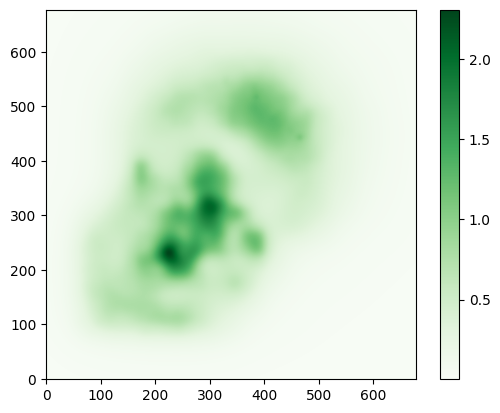

In [27]:
plt.imshow(data_img, cmap='Greens')
plt.colorbar()
plt.gca().invert_yaxis()